# Sub-task 1: Unsupervised Learning

## Part A: Code

In [3]:
from sklearn.cluster import KMeans
import pandas as pd   # We require pandas to import the data from the csv files.
import numpy as np    # We require numpy for the implementation of k-means.
import matplotlib.cm as cm
from matplotlib import colormaps
import matplotlib.pyplot as plt # We require pyplot to visualise the data.
from sklearn.metrics import silhouette_score, mean_squared_error, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [4]:
data = pd.read_csv("cluster1.csv", header= None) #ensure first row is not treated as column names
data

,0,1
0,-1.993600,-1.4564
1,0.918930,-1.3925
2,1.446200,-3.1794
3,0.390930,-1.5674
4,2.699200,-5.1001
...,...,...
595,-0.935660,-1.3848
596,2.701200,-3.7438
597,-0.852540,-1.5795
598,0.044536,-1.6157


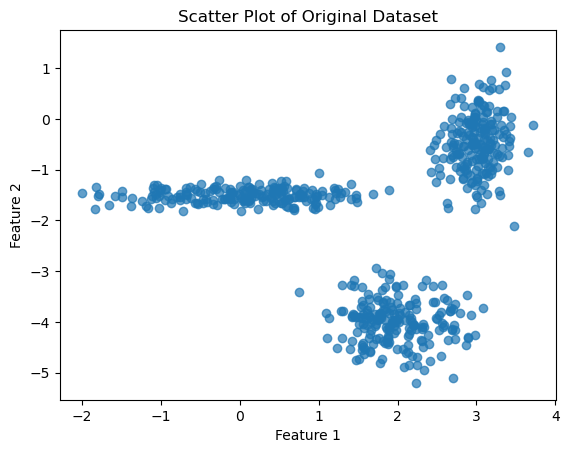

In [5]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Original Dataset')
plt.show()

## Visulasation of the Dataset into 3 clusters (k=3) through Scatter Plot:

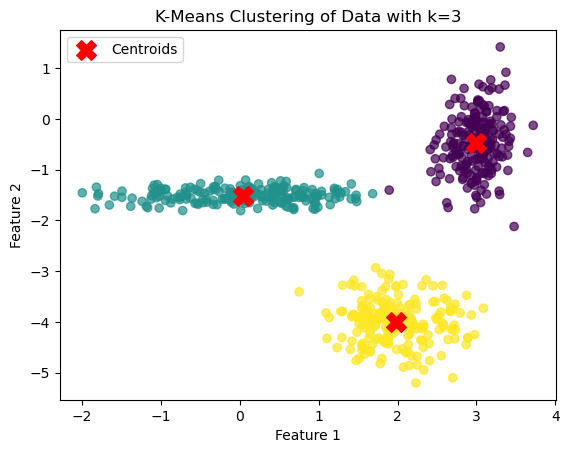

In [7]:
data.columns = data.columns.astype(str)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
data['Cluster_3'] = kmeans_3.fit_predict(data)
# Plot the resulting clusters
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['Cluster_3'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
#Centroids are data points representing the center of a cluster. # Final locations of the centroid ...: kmeans.cluster_centers_
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering of Data with k=3')
plt.legend()
plt.show()

## Visualisation of the Dataset into 10 clusters (k=10) through Scatter Plot:

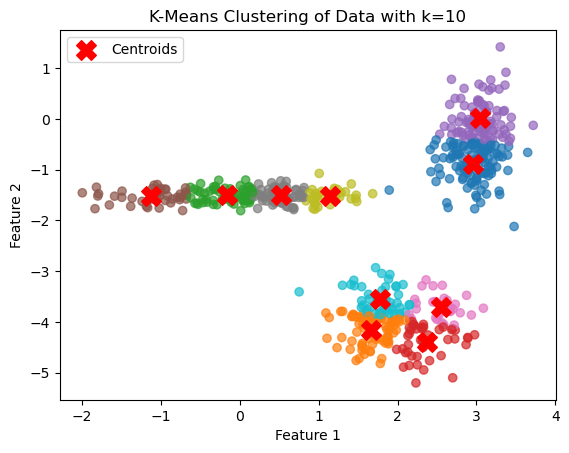

In [9]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
data['Cluster_10'] = kmeans_10.fit_predict(data)
# Plot the resulting clusters
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['Cluster_10'], cmap=colormaps['tab10'], alpha=0.7)
plt.scatter(kmeans_10.cluster_centers_[:, 0], kmeans_10.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering of Data with k=10')
plt.legend()
plt.show()

## Analysis of the clustered dataset (k=3, k=10):

### Reconstruction Errors:

In [12]:
# Measure reconstruction errors--> (SSD)

ssd_k3 = kmeans_3.inertia_
ssd_k10 = kmeans_10.inertia_

#The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, 
#minimizing a criterion known as the inertia or within-cluster sum-of-squares 
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion


print(f"Reconstruction Error (SSD) with k=3: {ssd_k3}")
print(f"Reconstruction Error (SSD) with k=10: {ssd_k10}")

Reconstruction Error (SSD) with k=3: 279.27229429315173
Reconstruction Error (SSD) with k=10: 78.43555554246308


### Silhouette Score:

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Scale the data for clustering-> mean of 0 and standard deviation of 1--> so all features are treated equally by K-Means algorithm
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Calculate Silhouette Score for k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(scaled_data)
silhouette_avg_3 = silhouette_score(scaled_data, labels_3)

# Calculate Silhouette Score for k=10
kmeans_10 = KMeans(n_clusters=10, random_state=42)
labels_10 = kmeans_10.fit_predict(scaled_data)
silhouette_avg_10 = silhouette_score(scaled_data, labels_10)

# Print the results
print(f"Silhouette Score for k=3: {silhouette_avg_3}")
print(f"Silhouette Score for k=10: {silhouette_avg_10}")


Silhouette Score for k=3: 0.5957019461957019
Silhouette Score for k=10: 0.672323804463676


### Elbow Method Graph:

In [16]:
data = pd.read_csv("cluster1.csv", header= None)
data.columns = data.columns.astype(str)
numeric_data = data.select_dtypes(include=['number'])

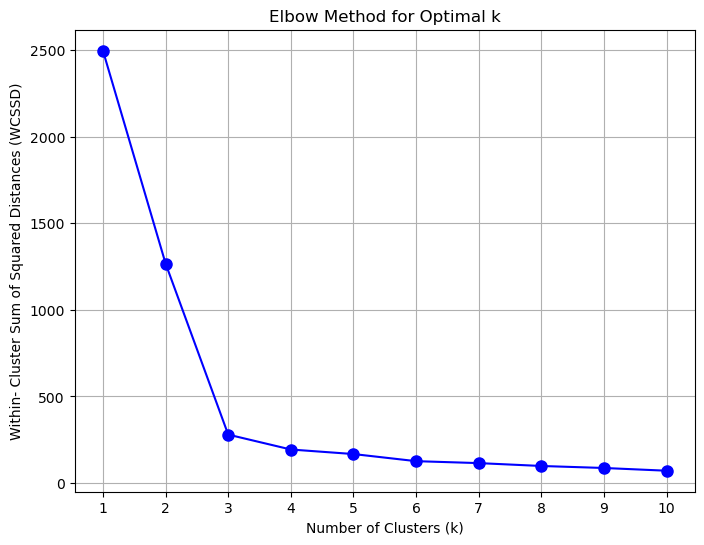

In [17]:

# Elbow Method: Calculate SSD for a range of k values
ssd = []  # List to store Sum of Squared Distances
K_range = range(1, 11)  # Range of k values to test

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data)
    ssd.append(kmeans.inertia_)  # kmeans.inertia_ gives the SSD for the current k

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, ssd, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within- Cluster Sum of Squared Distances (WCSSD)')
plt.xticks(K_range)
plt.grid()
plt.show()

### Silhouette analysis

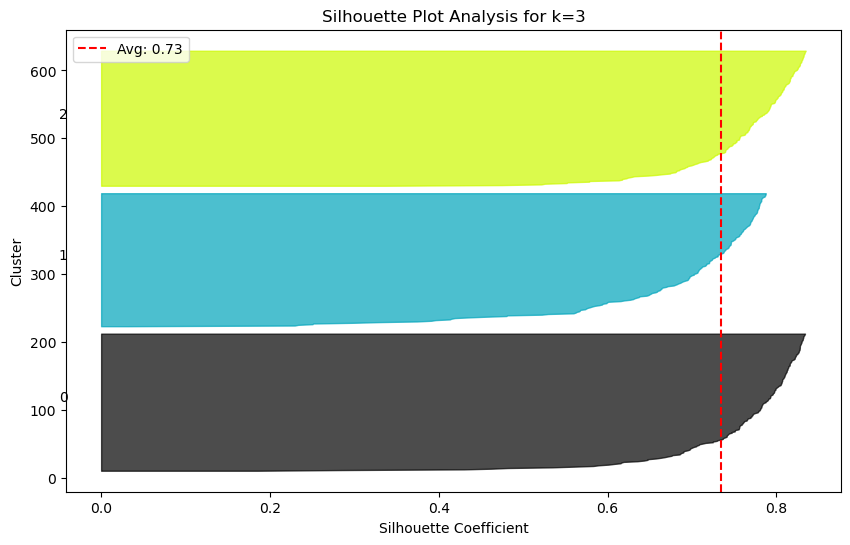

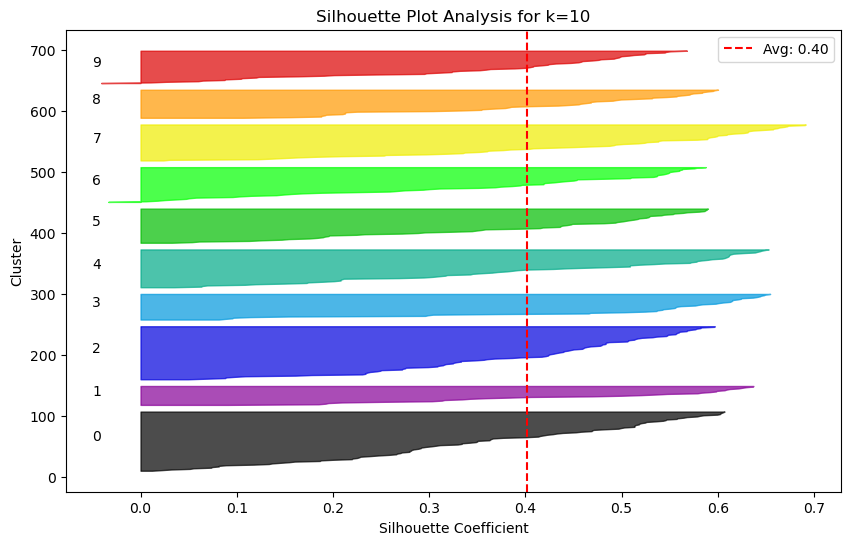

In [19]:
def silhouette_analysis(k, data):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    sample_silhouette_values = silhouette_samples(data, labels)
    
    # Plot silhouette analysis
    plt.figure(figsize=(10, 6))
    y_lower = 10  # Starting position for each cluster's silhouette bar
    for i in range(k):
        # Get silhouette values for the current cluster
        cluster_silhouette_values = sample_silhouette_values[labels == i]
        cluster_silhouette_values.sort()
        
        # Determine the size of the cluster
        cluster_size = len(cluster_silhouette_values)
        y_upper = y_lower + cluster_size
        
        # Colour each cluster differently
        colour = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_values,
            facecolor=colour,
            edgecolor=colour,
            alpha=0.7,
        )
        
        # Label the silhouette plot with cluster numbers
        plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 10  # Add space between clusters

    # Plot the silhouette average
    plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Avg: {silhouette_avg:.2f}")
    plt.title(f"Silhouette Plot Analysis for k={k}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.legend()
    plt.show()

# Perform silhouette analysis for k=3 and k=10
silhouette_analysis(3, numeric_data)  # For k=3
silhouette_analysis(10, numeric_data)  # For k=10


## Part B: Written Justification (240 words)

I applied the K-Means algorithm for K=3 and K=10, analysing the results qualitatively and quantitatively.

The visual scatter plots of the clusters showed that K=3 aligned well with the natural groupings in the data, while K=10 produced fragmented clusters, splitting cohesive groupings into smaller subsets. Although K=10 reduced the reconstruction error(SSE) to 78.43 compared to 279.27 for K=3,this lower SSE does not necessarily indicate better clustering. Increasing K inherently reduces SSE as clusters become smaller and fit the data more precisely. However,this risks overfitting and losing generalisability(Tan,Steinbach and Pearson,2014).
To further evaluate the more optimal K,the Elbow Method was used.The graph showed a distinct "elbow" at K=3, indicating that beyond this point, adding more clusters resulted in minimal improvement in reducing SSE. 

Silhouette analysis:Silhouette Score for K=3 being 0.596, compared to 0.672 for K=10. While K=10 achieved a higher score, the silhouette plot revealed poor separation between clusters,as many clusters had overlapping coefficients,further confirming overfitting. Suggesting K=10 introduces unnecessary complexity without meaningful improvement. 

Based on the evidence,K=3 provides a better balance between simplicity, interpretability, and generalisability. Therefore,I disagree with my colleague’s conclusion that K=10 is more suitable,as their reasoning relies solely on reconstruction error and fails to consider the risks of overfitting. The combined results of the Elbow Method, Silhouette Analysis, and visual plots justify K=3 as the more optimal number of clusters for this dataset.

### Reference: 

Tan, P.-N., Steinbach, M. and Pearson, V. (2014). Introduction to Data Mining. [online] Available at: https://www.ceom.ou.edu/media/docs/upload/Pang-Ning_Tan_Michael_Steinbach_Vipin_Kumar_-_Introduction_to_Data_Mining-Pe_NRDK4fi.pdf.